In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import pickle

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)
%matplotlib inline


In [4]:
# load the data
training_data = pd.read_csv('train_data.csv')
testing_data = pd.read_csv('test_data.csv')

In [5]:

# check the data
training_data.head()

,sentence,sentiment
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [ ]:
# check the data
testing_data.head()

,sentence,sentiment
0,i loooooooovvvvvveee my kindle not that the dx...,1
1,reading my kindle love it lee childs is good read,1
2,ok first assesment of the kindle it fucking rocks,1
3,you ll love your kindle i ve had mine for a fe...,1
4,fair enough but i have the kindle and i think ...,1


In [ ]:

# check the shape of the data
print("Training data shape: ", training_data.shape)
print("Testing data shape: ", testing_data.shape)

Training data shape:  (1523975, 2)
Testing data shape:  (359, 2)


In [ ]:

# check the null values
training_data.isnull().sum()


sentence     0
sentiment    0
dtype: int64

In [ ]:
# check the null values
testing_data.isnull().sum()

sentence     0
sentiment    0
dtype: int64

In [ ]:

# unique values in the sentiment column
training_data['sentiment'].unique()

array([0, 1])

In [ ]:

# check the distribution of the data
training_data['sentiment'].value_counts()


0    767059
1    756916
Name: sentiment, dtype: int64

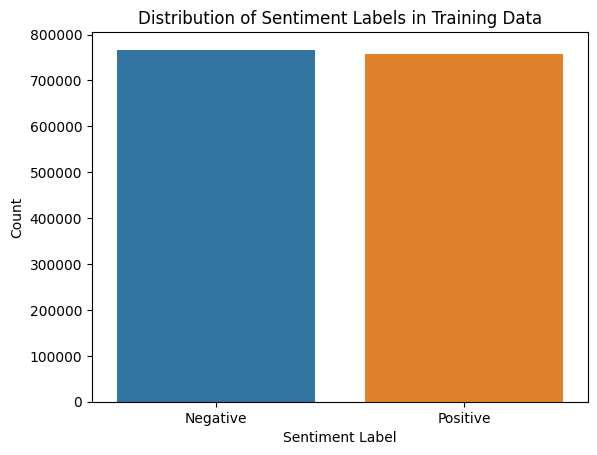

In [ ]:

# plot the distribution of sentiment labels in the training data
sns.countplot(x='sentiment', data=training_data)
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels in Training Data')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()


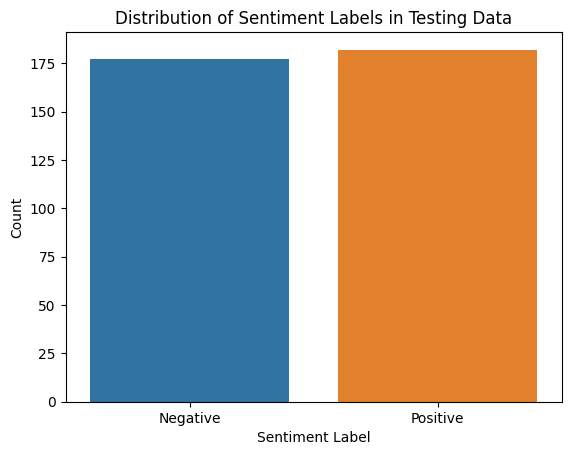

In [ ]:

# plot the distribution of sentiment labels in the testing data
sns.countplot(x='sentiment', data=testing_data)
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels in Testing Data')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

## Data PreProcessing

In [ ]:

# preprocess the data
training_data['sentence'] = training_data['sentence'].apply(lambda x: x.lower())
training_data['sentence'] = training_data['sentence'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

testing_data['sentence'] = testing_data['sentence'].apply(lambda x: x.lower())
testing_data['sentence'] = testing_data['sentence'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [ ]:

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

# stopwords removal
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

punctuation = list(string.punctuation)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:


# remove stopwords from the sentence
def remove_stopwords(sentence):
    sentence = sentence.split()
    sentence = [word for word in sentence if word not in stop_words]
    sentence = " ".join(sentence)
    return sentence

# lowercase the sentence
def lowercase(sentence):
    sentence = sentence.lower()
    return sentence

# remove punctuation from the sentence
def remove_punctuation(sentence):
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    return sentence

# remove numbers from the sentence
def remove_numbers(sentence):
    sentence = re.sub(r'\d+', '', sentence)
    return sentence

# remove extra spaces from the sentence
def remove_extra_spaces(sentence):
    sentence = re.sub(' +', ' ', sentence)
    return sentence

# remove stopwords from the sentence
def remove_stopwords(sentence):
    sentence = sentence.split()
    sentence = [word for word in sentence if word not in stop_words]
    sentence = " ".join(sentence)
    return sentence

# tokenize the sentence
def tokenize(sentence):
    tweet_tokenizer = nltk.tokenize.TweetTokenizer(strip_handles=True, reduce_len=True)
    sentence = tweet_tokenizer.tokenize(sentence)
    sentence = " ".join(sentence)
    return sentence

# preprocess the data
training_data['sentence'] = training_data['sentence'].apply(lowercase)
training_data['sentence'] = training_data['sentence'].apply(remove_punctuation)
training_data['sentence'] = training_data['sentence'].apply(remove_numbers)
training_data['sentence'] = training_data['sentence'].apply(remove_extra_spaces)
training_data['sentence'] = training_data['sentence'].apply(remove_stopwords)
training_data['sentence'] = training_data['sentence'].apply(tokenize)


In [ ]:
testing_data['sentence'] = testing_data['sentence'].apply(lowercase)
testing_data['sentence'] = testing_data['sentence'].apply(remove_punctuation)
testing_data['sentence'] = testing_data['sentence'].apply(remove_numbers)
testing_data['sentence'] = testing_data['sentence'].apply(remove_extra_spaces)
testing_data['sentence'] = testing_data['sentence'].apply(remove_stopwords)
testing_data['sentence'] = testing_data['sentence'].apply(tokenize)

## Split the data into train and validation set

In [ ]:
# split the data into train and validation set
train_x, valid_x, train_y, valid_y = train_test_split(training_data['sentence'], training_data['sentiment'], test_size=0.2, random_state=42)

In [ ]:
# tokenize the data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
train_x_tfidf = tfidf_vectorizer.fit_transform(train_x)
valid_x_tfidf = tfidf_vectorizer.transform(valid_x)


In [ ]:
# train the model
logistic_regression = LogisticRegression()
logistic_regression.fit(train_x_tfidf, train_y)


LogisticRegression()

In [ ]:

# predict the sentiment of the validation set
predictions = logistic_regression.predict(valid_x_tfidf)

In [ ]:
# print the classification report
print(classification_report(valid_y, predictions))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76    153092
           1       0.76      0.79      0.77    151703

    accuracy                           0.77    304795
   macro avg       0.77      0.77      0.77    304795
weighted avg       0.77      0.77      0.77    304795



In [ ]:

# print the confusion matrix
print(confusion_matrix(valid_y, predictions))

[[114459  38633]
 [ 32347 119356]]


In [ ]:

# predict the sentiment of the testing set
test_x_tfidf = tfidf_vectorizer.transform(testing_data['sentence'])
predictions = logistic_regression.predict(test_x_tfidf)

# print the classification report
print(classification_report(testing_data['sentiment'], predictions))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       177
           1       0.81      0.83      0.82       182

    accuracy                           0.81       359
   macro avg       0.81      0.81      0.81       359
weighted avg       0.81      0.81      0.81       359



In [ ]:
# save the model
pickle.dump(logistic_regression, open('logistic_regression.pkl', 'wb'))
pickle.dump(tfidf_vectorizer, open('tfidf_vectorizer.pkl', 'wb'))


In [ ]:
# load the model
logistic_regression = pickle.load(open('logistic_regression.pkl', 'rb'))
tfidf_vectorizer = pickle.load(open('tfidf_vectorizer.pkl', 'rb'))


In [ ]:

# predict the sentiment from the user input
def predict_sentiment(user_input):
    user_input = lowercase(user_input)
    user_input = remove_punctuation(user_input)
    user_input = remove_numbers(user_input)
    user_input = remove_extra_spaces(user_input)
    user_input = remove_stopwords(user_input)
    user_input = tokenize(user_input)
    user_input = tfidf_vectorizer.transform([user_input])
    prediction = logistic_regression.predict(user_input)
    return prediction

# get the user input
user_input = input("Enter a sentence: ")

# predict the sentiment of the user input
prediction = predict_sentiment(user_input)

# print the sentiment
if prediction == 0:
    print("Negative")
else:
    print("Positive")


Enter a sentence: I hate the product
Negative
